In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [28]:
calories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Calories Burnt Prediction/calories.csv')
exercise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Calories Burnt Prediction/exercise.csv')

In [29]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [30]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [31]:
# Combining the two Dataframes
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [32]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [33]:
calories_data.shape

(15000, 9)

In [34]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [35]:
calories_data.drop(columns=['User_ID']).describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [36]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [37]:
sns.set()

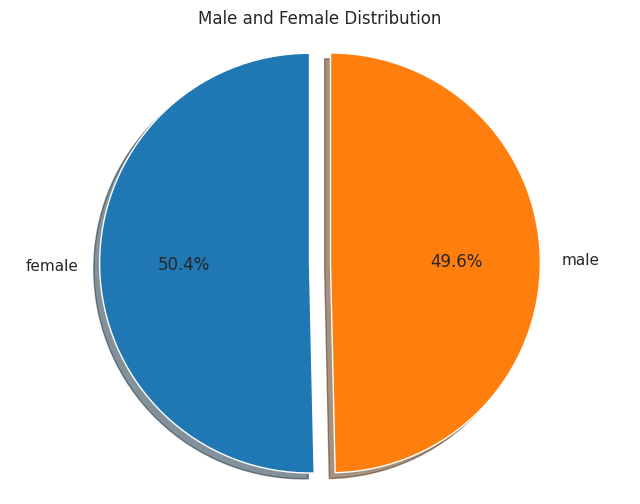

In [41]:
gender_distribution = calories_data['Gender'].value_counts()

# Create a pie chart
labels = gender_distribution.index  # ['Male', 'Female']
sizes = gender_distribution.values  # Corresponding counts
colors = ['#1f77b4', '#ff7f0e']  # Custom colors
explode = (0.1, 0)  # Explode the first slice (if Male is first)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.title('Male and Female Distribution')
plt.show()

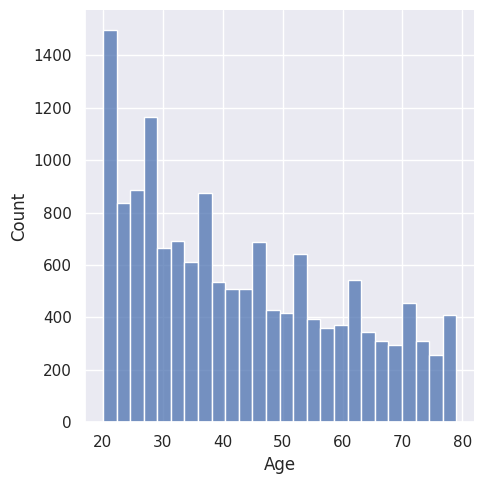

In [49]:
# finding distribution of Age
sns.displot(calories_data['Age'])
# Density - eg. for age 20 there are more people in the given data set and less people come to gym when they get older

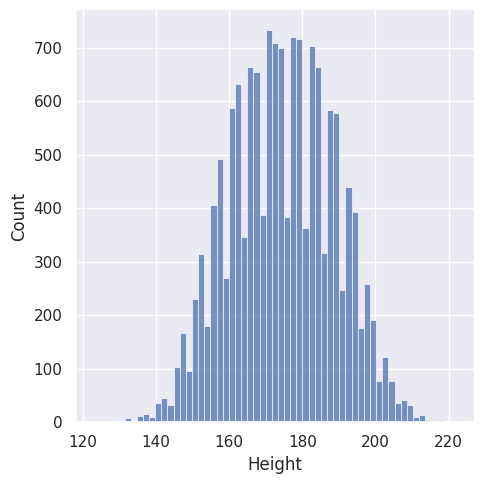

In [51]:
# finding distribution of Height
sns.displot(calories_data['Height'])

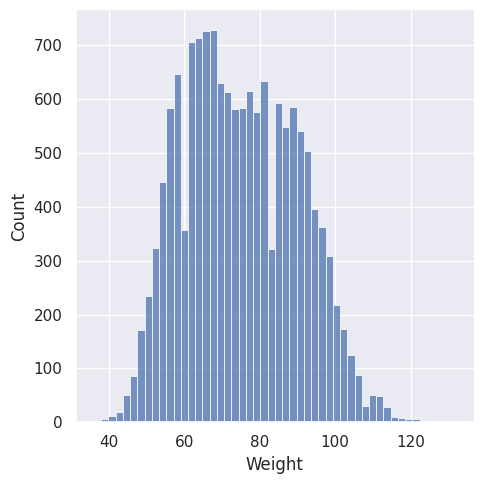

In [45]:
# finding distribution of Weight
sns.displot(calories_data['Weight'])

<Axes: >

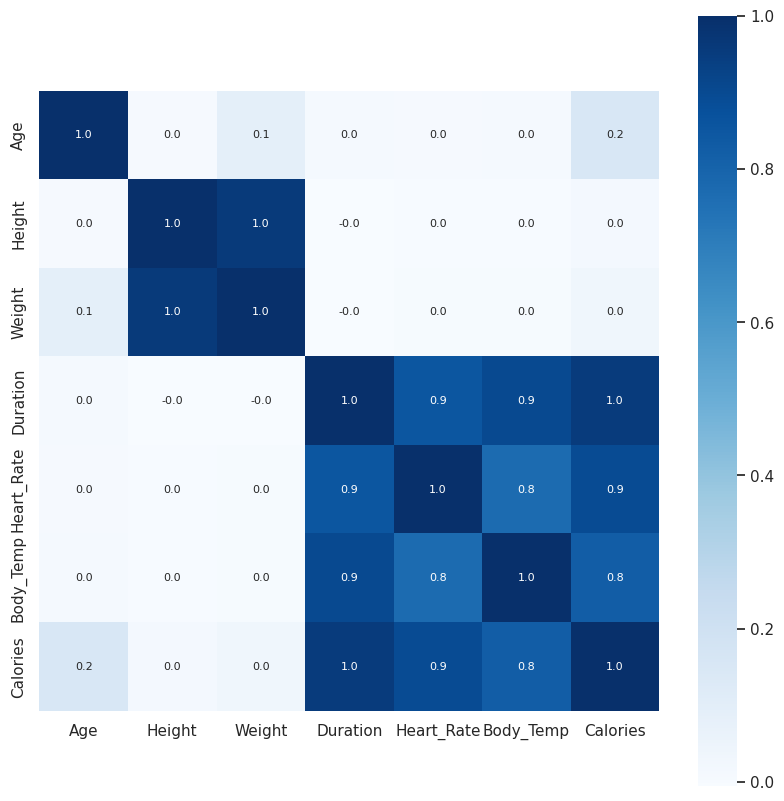

In [52]:
correlation = calories_data.drop(columns=['User_ID','Gender']).corr()

# Creating a SNS Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot=True , cmap='Blues' , square = True , annot_kws={'size':8}, fmt = '.1f')

In [55]:
# Encoding the categoriacal data is out machine learning model can understand numeric data better than text

# Changing for Gender Column
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [56]:
X = calories_data.drop(columns = ['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [57]:
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [59]:
# Splitting data into train+val(80%) and test(20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
# Splitting data into train 75% and validation set 25%
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=2)

In [61]:
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (9000, 7)
Validation set shape: (3000, 7)
Test set shape: (3000, 7)


In [62]:
# Training the model
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
# Evaluation of the model on training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[154.49507  161.9995     1.873306 ...  21.079052  18.444977 223.8768  ]


In [67]:
error_score = mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error: ", error_score)

Mean Absolute Error:  0.8731127802266015


In [68]:
# Evaluation of the model on testing data
testing_data_prediction = model.predict(X_test)
print(testing_data_prediction)

[126.85308  219.57045   36.87633  ... 144.4251    23.989523  91.15523 ]


In [69]:
error_score = mean_absolute_error(Y_test, testing_data_prediction)
print("Mean Absolute Error: ", error_score)

Mean Absolute Error:  1.566901089131832


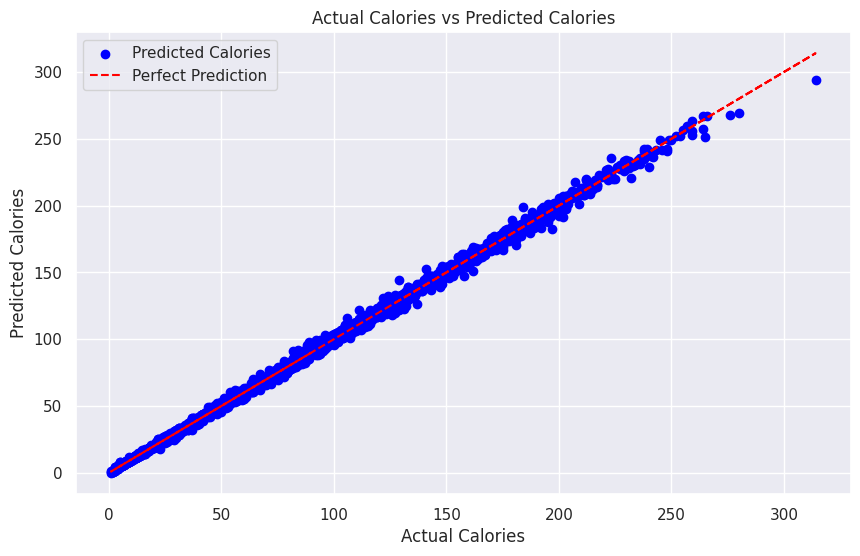

In [72]:
# Visualize actual and predicted prices with a line of equality
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction, color='blue', label='Predicted Calories')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual Calories vs Predicted Calories")
plt.legend()
plt.show()

In [70]:
# Evaluation of the model on validaiton data
validation_data_prediction = model.predict(X_val)
print(validation_data_prediction)

[  6.847719 168.73122   81.722755 ...  91.9854    12.54586  181.45105 ]


In [71]:
error_score = mean_absolute_error(Y_val, validation_data_prediction)
print("Mean Absolute Error: ", error_score)

Mean Absolute Error:  1.5851729197303455


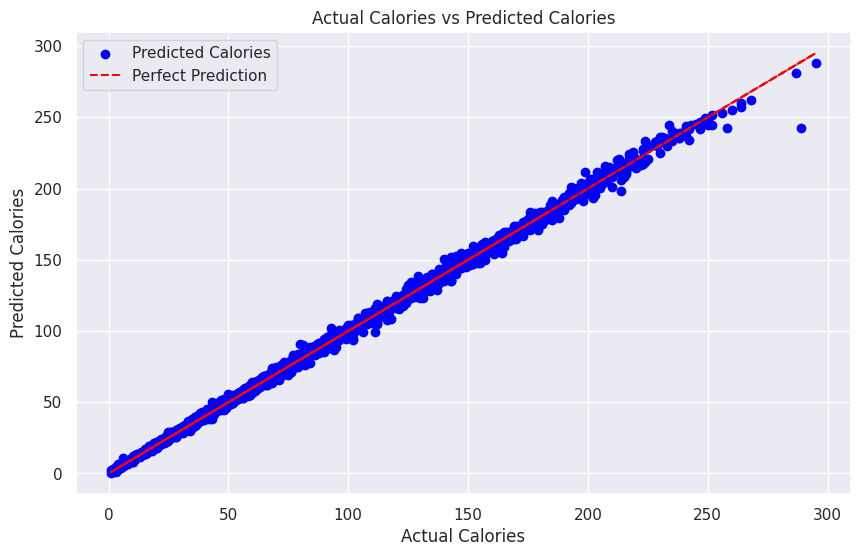

In [73]:
# Visualize actual and predicted prices with a line of equality
plt.figure(figsize=(10, 6))
plt.scatter(Y_val, validation_data_prediction, color='blue', label='Predicted Calories')
plt.plot(Y_val, Y_val, color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual Calories vs Predicted Calories")
plt.legend()
plt.show()